In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
DATA_DIR = "/content/drive/MyDrive/Grad"

In [37]:
categories = os.listdir(DATA_DIR)
categories = [dir_ for dir_ in categories if dir_ !=".ipynb_checkpoints"]
print(f"There are {len(categories)} categories of food")

There are 10 categories of food


In [38]:
import matplotlib.pyplot as plt
import glob
import os

In [39]:
def plot_random_image(category, axis = False, ax=None):
    directory = os.path.join(DATA_DIR, category)
    images = glob.glob(f"{directory}/*")
    random_int = np.random.randint(0, len(images)-1)
    random_image = images[random_int]
    img = plt.imread(random_image)
    ax.imshow(img)
    ax.set_title(category)
    ax.axis(axis)

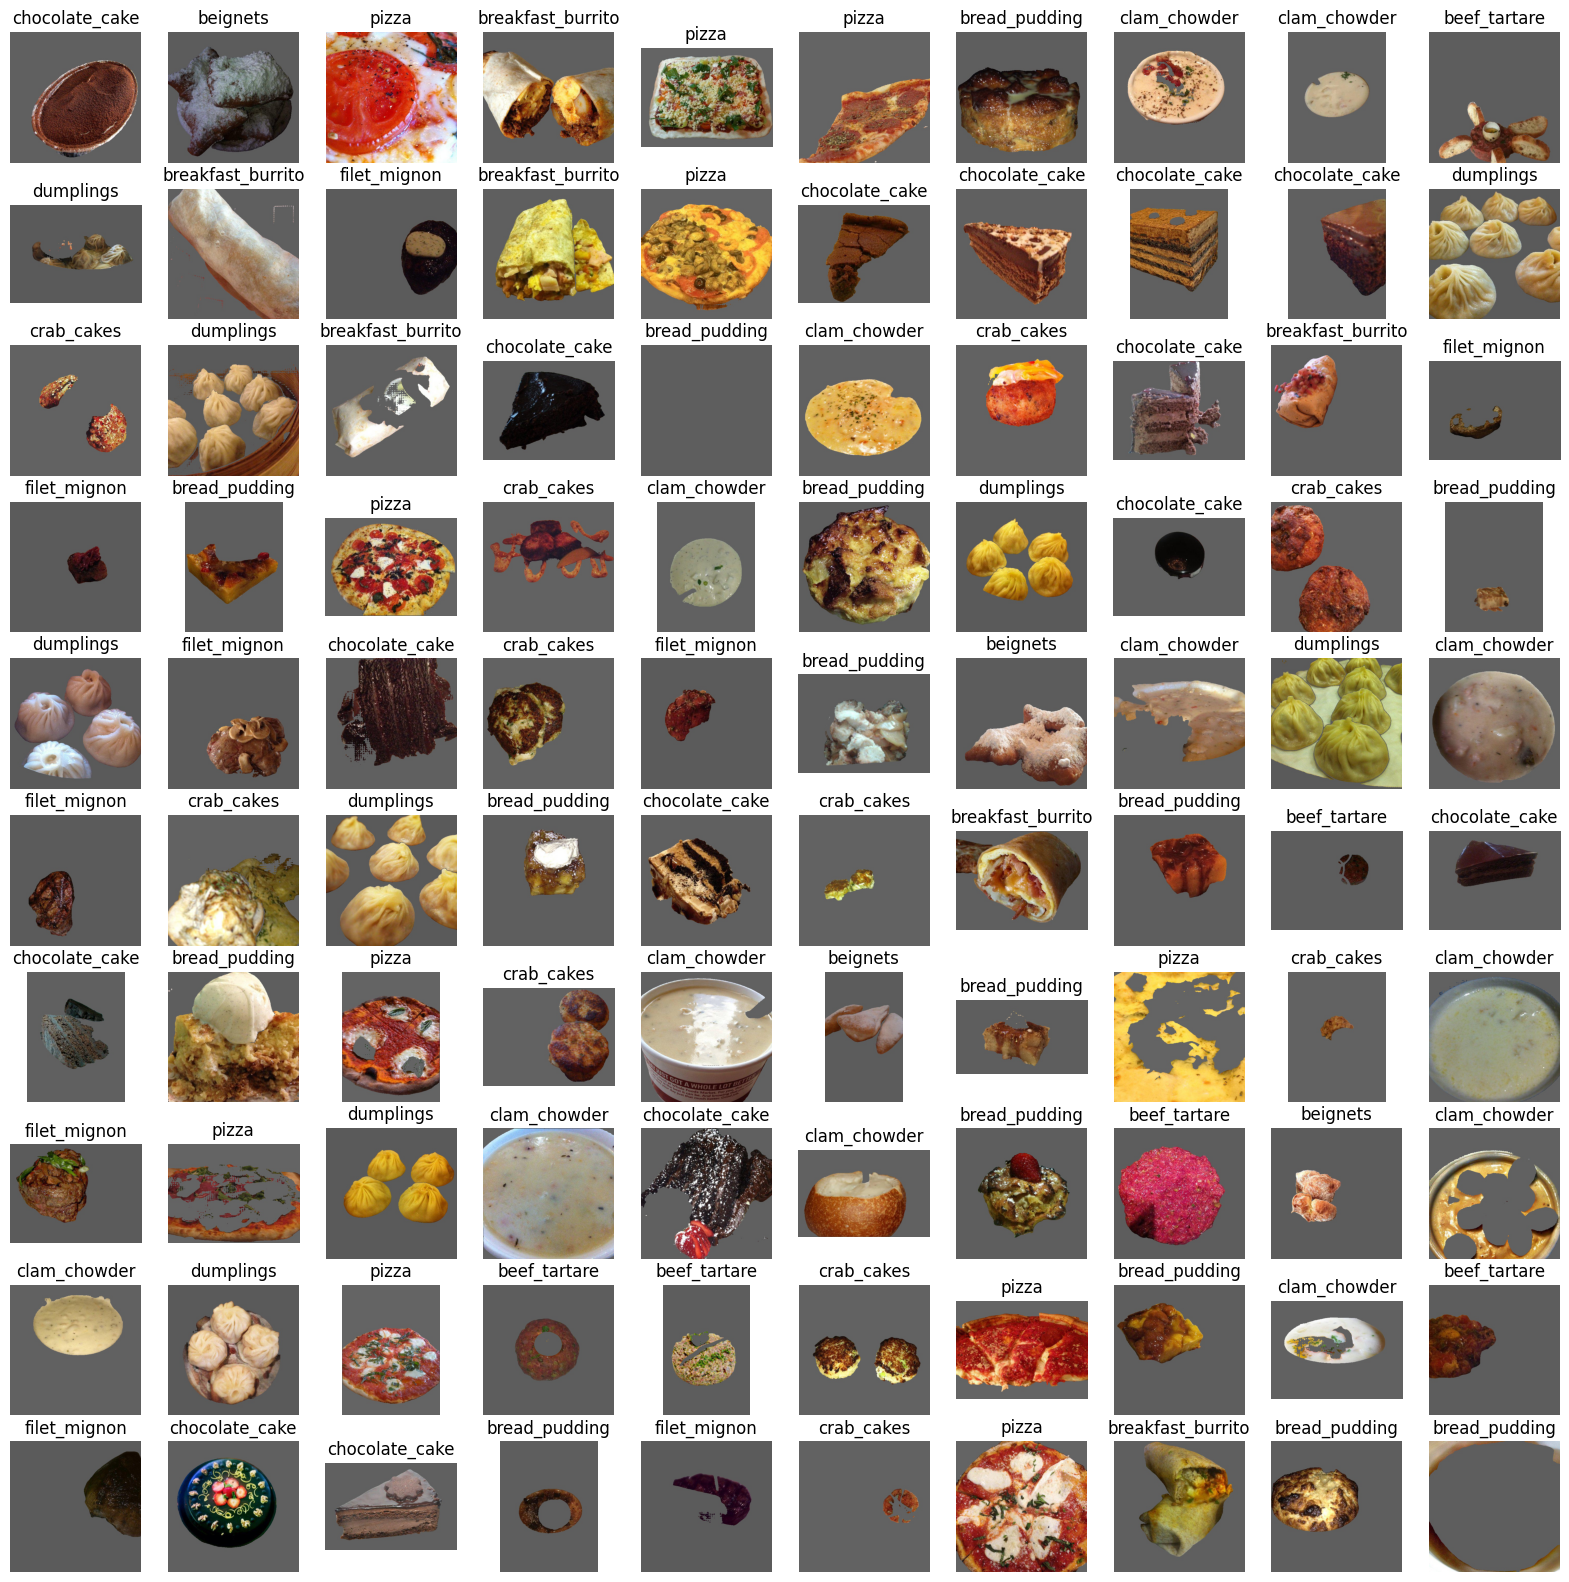

In [40]:
row = 10
col = 10
fig, axes = plt.subplots(row, col, figsize = (20, 20))
axes = axes.flatten()
for i, ax in enumerate(axes):
    print(f"Adding Image: {(i+1):>3d}/{row*col:>3d}", end = "\r")
    random_cat = np.random.choice(categories)
    plot_random_image(random_cat, ax = ax)
    
fig.show()

In [41]:
for cat in categories:
    print(f"There are {len(os.listdir(os.path.join(DATA_DIR, cat)))} images in {cat}")

There are 954 images in pizza
There are 951 images in dumplings
There are 947 images in filet_mignon
There are 982 images in beignets
There are 955 images in beef_tartare
There are 928 images in bread_pudding
There are 956 images in breakfast_burrito
There are 977 images in chocolate_cake
There are 949 images in clam_chowder
There are 942 images in crab_cakes


In [42]:
df = pd.DataFrame(columns=["path", "label"])

# Iterate over the categories and append the file paths and labels to the DataFrame
for cat in categories:
    cat_path = os.path.join(DATA_DIR, cat)
    for file in os.listdir(cat_path):
        file_path = os.path.join(cat_path, file)
        df = df.append({"path": file_path, "label": cat}, ignore_index=True)

df.head()

Streaming output truncated to the last 5000 lines.
<ipython-input-42-d260918da353>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"path": file_path, "label": cat}, ignore_index=True)
<ipython-input-42-d260918da353>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"path": file_path, "label": cat}, ignore_index=True)
<ipython-input-42-d260918da353>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"path": file_path, "label": cat}, ignore_index=True)
<ipython-input-42-d260918da353>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"path": file_path, "label": cat}, ignore_index

,path,label
0,/content/drive/MyDrive/Grad/pizza/372275.jpg,pizza
1,/content/drive/MyDrive/Grad/pizza/2224099.jpg,pizza
2,/content/drive/MyDrive/Grad/pizza/875262.jpg,pizza
3,/content/drive/MyDrive/Grad/pizza/2126709.jpg,pizza
4,/content/drive/MyDrive/Grad/pizza/920595.jpg,pizza


In [43]:
df.head()

,path,label
0,/content/drive/MyDrive/Grad/pizza/372275.jpg,pizza
1,/content/drive/MyDrive/Grad/pizza/2224099.jpg,pizza
2,/content/drive/MyDrive/Grad/pizza/875262.jpg,pizza
3,/content/drive/MyDrive/Grad/pizza/2126709.jpg,pizza
4,/content/drive/MyDrive/Grad/pizza/920595.jpg,pizza


In [44]:
df.shape

(9541, 2)

In [45]:
df['label'].value_counts()

beignets             982
chocolate_cake       977
breakfast_burrito    956
beef_tartare         955
pizza                954
dumplings            951
clam_chowder         949
filet_mignon         947
crab_cakes           942
bread_pudding        928
Name: label, dtype: int64

In [46]:
df["idx"] = df["path"].apply(lambda x: os.path.splitext(os.path.basename(x))[0])
df.head()

,path,label,idx
0,/content/drive/MyDrive/Grad/pizza/372275.jpg,pizza,372275
1,/content/drive/MyDrive/Grad/pizza/2224099.jpg,pizza,2224099
2,/content/drive/MyDrive/Grad/pizza/875262.jpg,pizza,875262
3,/content/drive/MyDrive/Grad/pizza/2126709.jpg,pizza,2126709
4,/content/drive/MyDrive/Grad/pizza/920595.jpg,pizza,920595


In [47]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets with a 75:25 split
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

print(f"Train set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

Train set size: 7155
Test set size: 2386


In [48]:
train_df['label'].value_counts()

chocolate_cake       758
beignets             740
breakfast_burrito    728
filet_mignon         721
clam_chowder         711
dumplings            707
pizza                707
crab_cakes           699
beef_tartare         695
bread_pudding        689
Name: label, dtype: int64

In [49]:
test_df['label'].value_counts()

beef_tartare         260
pizza                247
dumplings            244
crab_cakes           243
beignets             242
bread_pudding        239
clam_chowder         238
breakfast_burrito    228
filet_mignon         226
chocolate_cake       219
Name: label, dtype: int64

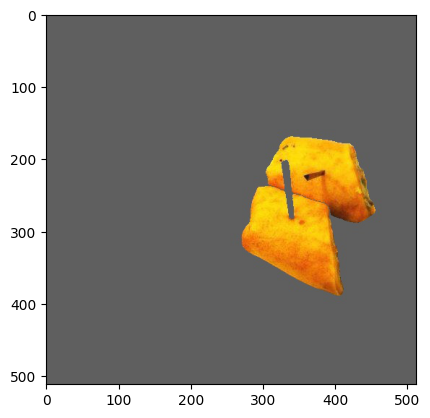

In [50]:
from matplotlib import pyplot as plt
img = plt.imread(train_df['path'].iloc[0])
plt.imshow(img)

In [51]:
train_copy = train_df.copy()
test_copy = test_df.copy()

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False, # randomly flip images
    zoom_range=[.8, 1],
    channel_shift_range=30,
    fill_mode='reflect',
    )
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [53]:
allowed_labels = ['beignets', 'pizza', 'beef_tartare', 'chocolate_cake', 'clam_chowder']
n_classes = len(allowed_labels)
train_df = train_df[train_df['label'].isin(allowed_labels)]
test_df = test_df[test_df['label'].isin(allowed_labels)]

train_gen = datagen.flow_from_dataframe(dataframe = train_df, directory=None, x_col='path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb',
    classes=None, class_mode='categorical', batch_size=32, shuffle=True)


test_gen = test_datagen.flow_from_dataframe(dataframe = test_df, directory=None, x_col='path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb',
    classes=None, class_mode='categorical', batch_size=32, shuffle=True)

Found 3611 validated image filenames belonging to 5 classes.
Found 1206 validated image filenames belonging to 5 classes.


In [54]:
length_train = len(train_gen)

In [55]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.xception import Xception

In [56]:
def create_model(pre_trained_model):
    x = pre_trained_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256,activation='relu')(x)
    # x = Dropout(0.4)(x)
    x = Dense(128,activation='relu')(x)
    x = Dropout(0.2)(x)

    predictions = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=pre_trained_model.input, outputs=predictions)
    model.compile(optimizer=SGD(lr=0.0001, momentum = 0.9), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [57]:
from tensorflow.keras.applications.xception import Xception
pre_trained_model = Xception(weights='imagenet', include_top=False)

model = create_model(pre_trained_model)
history5 = model.fit(train_gen,
                    validation_data = test_gen,
                    steps_per_epoch = length_train // 32,
                    epochs=20,
                    verbose=1)
# joblib.dump(model, 'model_Xion.pkl')

Epoch 1/20
3/3 [==============================] - 27s 6s/step - loss: 1.1147 - accuracy: 0.3333 - val_loss: 1.0417 - val_accuracy: 0.5064
Epoch 2/20
3/3 [==============================] - 8s 4s/step - loss: 1.0675 - accuracy: 0.4792 - val_loss: 0.9803 - val_accuracy: 0.6009
Epoch 3/20
3/3 [==============================] - 10s 4s/step - loss: 0.9810 - accuracy: 0.6250 - val_loss: 0.9030 - val_accuracy: 0.6838
Epoch 4/20
3/3 [==============================] - 10s 4s/step - loss: 0.9230 - accuracy: 0.6562 - val_loss: 0.8017 - val_accuracy: 0.7625
Epoch 5/20
3/3 [==============================] - 9s 4s/step - loss: 0.7567 - accuracy: 0.8750 - val_loss: 0.6817 - val_accuracy: 0.8054
Epoch 6/20
3/3 [==============================] - 9s 3s/step - loss: 0.6381 - accuracy: 0.8333 - val_loss: 0.5862 - val_accuracy: 0.8112
Epoch 7/20
3/3 [==============================] - 10s 4s/step - loss: 0.5241 - accuracy: 0.8854 - val_loss: 0.5307 - val_accuracy: 0.8112
Epoch 8/20
3/3 [=====================

In [58]:
import joblib
# joblib.dump(model, 'model_VGG.pkl')
from tensorflow.keras.applications import InceptionResNetV2
pre_trained_model = InceptionResNetV2(include_top = False,
                            weights = 'imagenet')

model = create_model(pre_trained_model)
history3 = model.fit(train_gen,
                    validation_data = test_gen,
                    steps_per_epoch = length_train // 32,
                    epochs=20,
                    verbose=1)
# joblib.dump(model, 'model_IRN.pkl')

Epoch 1/20
3/3 [==============================] - 68s 7s/step - loss: 1.1304 - accuracy: 0.3750 - val_loss: 1.0645 - val_accuracy: 0.3720
Epoch 2/20
3/3 [==============================] - 10s 4s/step - loss: 0.9664 - accuracy: 0.5000 - val_loss: 0.6957 - val_accuracy: 0.7353
Epoch 3/20
3/3 [==============================] - 10s 4s/step - loss: 0.7937 - accuracy: 0.6875 - val_loss: 0.4408 - val_accuracy: 0.8770
Epoch 4/20
3/3 [==============================] - 9s 4s/step - loss: 0.6489 - accuracy: 0.7917 - val_loss: 0.3218 - val_accuracy: 0.8984
Epoch 5/20
3/3 [==============================] - 10s 4s/step - loss: 0.3914 - accuracy: 0.8750 - val_loss: 0.5223 - val_accuracy: 0.7797
Epoch 6/20
3/3 [==============================] - 10s 4s/step - loss: 0.2509 - accuracy: 0.9375 - val_loss: 2.6400 - val_accuracy: 0.5908
Epoch 7/20
3/3 [==============================] - 8s 4s/step - loss: 0.2261 - accuracy: 0.9375 - val_loss: 3.4084 - val_accuracy: 0.5007
Epoch 8/20
3/3 [====================

In [59]:
from tensorflow.keras.applications import ResNet152V2
pre_trained_model = ResNet152V2(include_top = False,
                            weights = 'imagenet')

model = create_model(pre_trained_model)
history2 = model.fit(train_gen,
                    validation_data = test_gen,
                    steps_per_epoch = length_train // 32,
                    epochs=20,
                    verbose=1)
# joblib.dump(model, 'model_RN152.pkl')

Epoch 1/20
3/3 [==============================] - 64s 7s/step - loss: 1.0778 - accuracy: 0.4583 - val_loss: 0.9651 - val_accuracy: 0.5851
Epoch 2/20
3/3 [==============================] - 10s 4s/step - loss: 0.7815 - accuracy: 0.6562 - val_loss: 0.5511 - val_accuracy: 0.8240
Epoch 3/20
3/3 [==============================] - 11s 5s/step - loss: 0.5646 - accuracy: 0.8021 - val_loss: 0.4989 - val_accuracy: 0.8169
Epoch 4/20
3/3 [==============================] - 14s 6s/step - loss: 0.3245 - accuracy: 0.8750 - val_loss: 0.6724 - val_accuracy: 0.8183
Epoch 5/20
3/3 [==============================] - 14s 6s/step - loss: 0.2265 - accuracy: 0.9167 - val_loss: 0.7381 - val_accuracy: 0.8526
Epoch 6/20
3/3 [==============================] - 14s 6s/step - loss: 0.2065 - accuracy: 0.9271 - val_loss: 1.1861 - val_accuracy: 0.8140
Epoch 7/20
3/3 [==============================] - 10s 4s/step - loss: 0.1139 - accuracy: 0.9375 - val_loss: 2.2154 - val_accuracy: 0.7382
Epoch 8/20
3/3 [==================

In [60]:
from tensorflow.keras.applications import DenseNet201
pre_trained_model = DenseNet201(include_top = False,
                            weights = 'imagenet')
model = create_model(pre_trained_model)
history4 = model.fit(train_gen,
                    validation_data = test_gen,
                    steps_per_epoch = length_train // 32,
                    epochs=20,
                    verbose=1)
# joblib.dump(model, 'model_DN201.pkl')

Epoch 1/20
3/3 [==============================] - 75s 8s/step - loss: 1.0896 - accuracy: 0.5417 - val_loss: 0.9232 - val_accuracy: 0.6180
Epoch 2/20
3/3 [==============================] - 13s 6s/step - loss: 0.6115 - accuracy: 0.8333 - val_loss: 0.6299 - val_accuracy: 0.7868
Epoch 3/20
3/3 [==============================] - 13s 6s/step - loss: 0.3404 - accuracy: 0.9062 - val_loss: 0.3951 - val_accuracy: 0.8627
Epoch 4/20
3/3 [==============================] - 9s 4s/step - loss: 0.3413 - accuracy: 0.8958 - val_loss: 0.6960 - val_accuracy: 0.7439
Epoch 5/20
3/3 [==============================] - 8s 3s/step - loss: 0.3038 - accuracy: 0.8958 - val_loss: 1.2168 - val_accuracy: 0.6781
Epoch 6/20
3/3 [==============================] - 9s 4s/step - loss: 0.2132 - accuracy: 0.9062 - val_loss: 1.3034 - val_accuracy: 0.6896
Epoch 7/20
3/3 [==============================] - 9s 4s/step - loss: 0.1190 - accuracy: 0.9688 - val_loss: 1.5194 - val_accuracy: 0.6981
Epoch 8/20
3/3 [======================

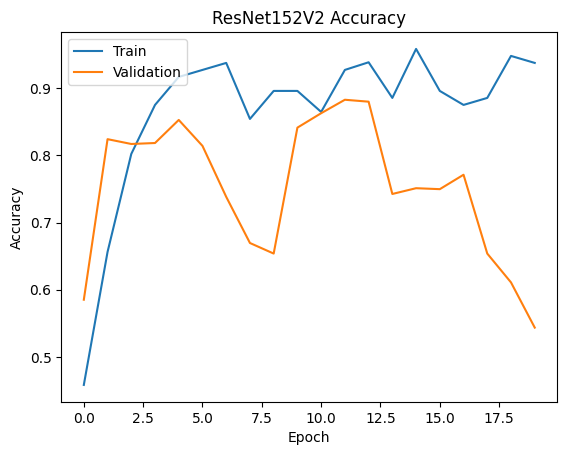

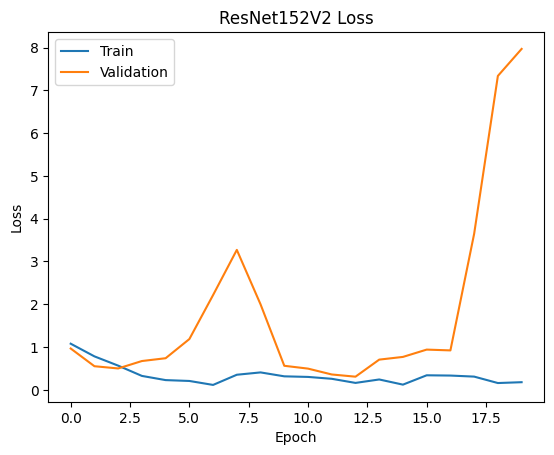

In [61]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('ResNet152V2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the losses
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('ResNet152V2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

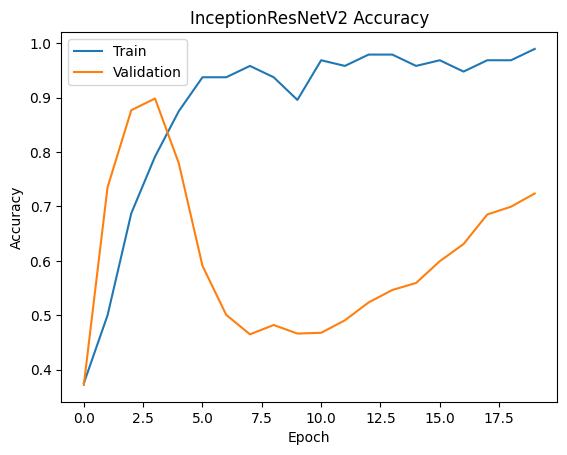

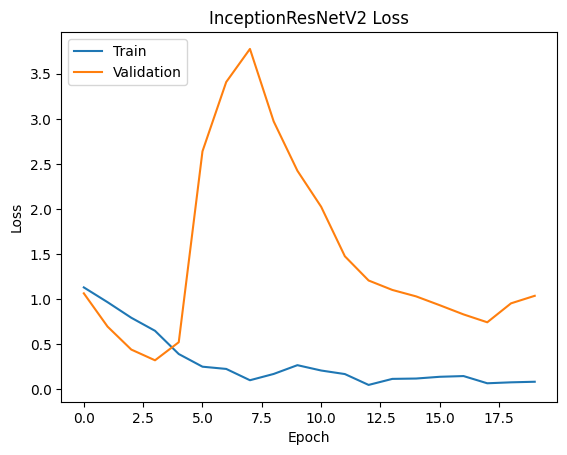

In [62]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('InceptionResNetV2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the losses
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('InceptionResNetV2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

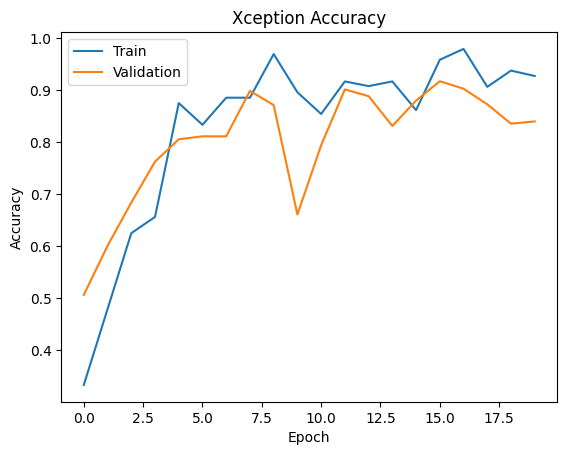

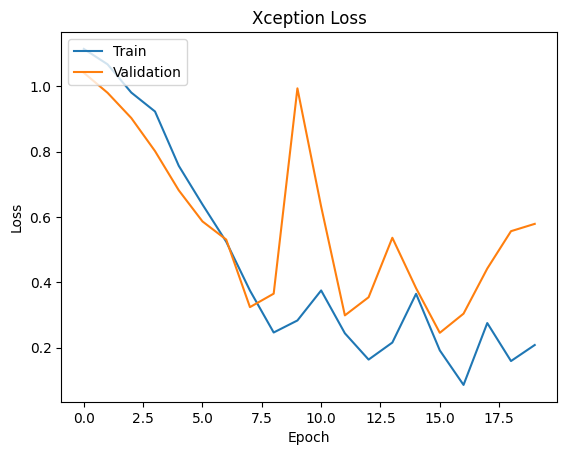

In [63]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Xception Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the losses
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Xception Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

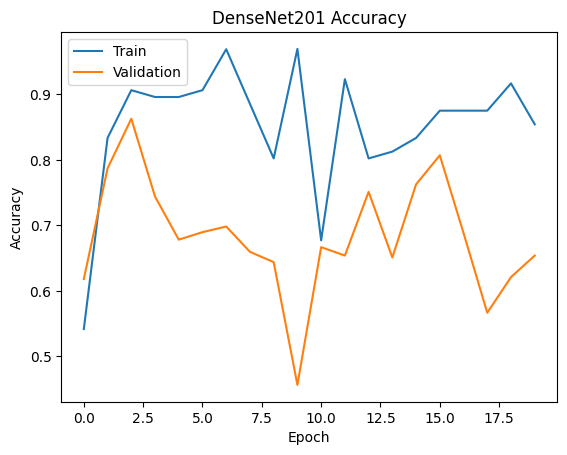

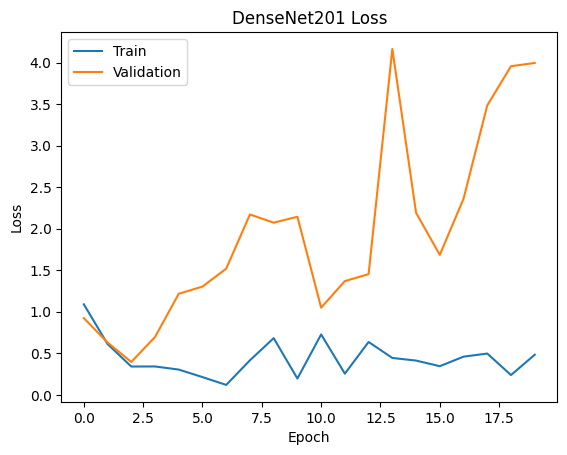

In [64]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('DenseNet201 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the losses
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('DenseNet201 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()